In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = sym.symbols('x')
m = sym.symbols('m')
k, omega = sym.symbols('k, omega')

C1, C2 = sym.symbols('C1 C2')
kappa, L, k_s, eta_s, T = sym.symbols('kappa L k_s eta_s T')
W = sym.Function('W')(x)

ODE = sym.Eq(W.diff(x, 2) + kappa**2*W, 0)
display(ODE)

W = C1 * sym.sin(kappa*x) + C2 * sym.cos(kappa*x)

Eq(kappa**2*W(x) + Derivative(W(x), (x, 2)), 0)

In [3]:
W_m = sym.Function('W_m')(x,m)
W_m = W.subs(x, x-m*L)*sym.exp(-1j*k*m*L)
display(W_m)

(C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m)

In [4]:
eq1 = sym.Eq(W_m.subs(m, m), W_m.subs(m, m+1))
eq2 = sym.Eq(-W_m.diff(x).subs(m, m) + W_m.diff(x).subs(m, m+1), k_s/T * W_m.subs(m,m))

display(eq1)
display(eq2)

eqns = [eq1.expand(), eq2.expand()]
M = sym.linear_eq_to_matrix(eqns, [C1, C2])[0]
display(M)

Eq((C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m), (C1*sin(kappa*(-L*(m + 1) + x)) + C2*cos(kappa*(-L*(m + 1) + x)))*exp(-1.0*I*L*k*(m + 1)))

Eq(-(C1*kappa*cos(kappa*(-L*m + x)) - C2*kappa*sin(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m) + (C1*kappa*cos(kappa*(-L*(m + 1) + x)) - C2*kappa*sin(kappa*(-L*(m + 1) + x)))*exp(-1.0*I*L*k*(m + 1)), k_s*(C1*sin(kappa*(-L*m + x)) + C2*cos(kappa*(-L*m + x)))*exp(-1.0*I*L*k*m)/T)

Matrix([
[                                                               -exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x) + exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*sin(L*kappa*m + L*kappa - kappa*x),                                                                 exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x) - exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*cos(L*kappa*m + L*kappa - kappa*x)],
[-kappa*exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x) + kappa*exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*cos(L*kappa*m + L*kappa - kappa*x) + k_s*exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x)/T, -kappa*exp(-1.0*I*L*k*m)*sin(L*kappa*m - kappa*x) + kappa*exp(-1.0*I*L*k)*exp(-1.0*I*L*k*m)*sin(L*kappa*m + L*kappa - kappa*x) - k_s*exp(-1.0*I*L*k*m)*cos(L*kappa*m - kappa*x)/T]])

In [5]:
xi, K_s = sym.symbols('xi, K_s')

disp_eq = M.det().expand()
disp_eq = disp_eq.subs(k_s/T, K_s).subs(sym.exp(-1j*k*L), xi)
disp_eq = disp_eq/kappa
disp_eq = disp_eq/sym.exp(-2j*L*k*m)

In [6]:
disp_eq.simplify()

-K_s*xi*sin(L*kappa)/kappa - 2*xi*cos(L*kappa) + xi**2.0 + 1

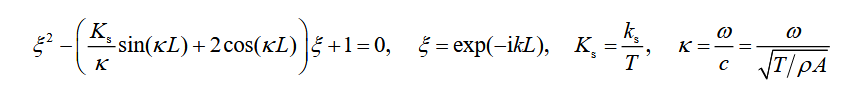

In [7]:
values = {L:10, K_s:4E3/15E3}

eq = sym.Eq(disp_eq.subs(values), 0)
sol = sym.solve(eq, xi)


In [8]:
display(sol[0])
display(sol[1])

0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa

0.0666666666666667*(15.0*kappa*cos(10.0*kappa) + 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa

In [47]:
xi1 = sol[0]
xi2 = sol[1]

k1 = 1j*sym.log(xi1)/(L)
k2 = 1j*sym.log(xi2)/(L)

print(k1)
print(k2)

xi1_lambda = sym.lambdify(kappa, xi1)
xi2_lambda = sym.lambdify(kappa, xi2)

k1_lambda = sym.lambdify(kappa, k1.subs(values))
k2_lambda = sym.lambdify(kappa, k2.subs(values))

1.0*I*log(0.0666666666666667*(15.0*kappa*cos(10.0*kappa) - 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa)/L
1.0*I*log(0.0666666666666667*(15.0*kappa*cos(10.0*kappa) + 15.0*sqrt(kappa**2*cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*sin(20.0*kappa) - 0.0177777777777778*cos(10.0*kappa)**2 + 0.0177777777777778) + 2.0*sin(10.0*kappa))/kappa)/L


In [60]:
def k1_func(omega):
    kappa = omega/np.sqrt(15E3/1.1)
    k1 = 1.0*1j*np.log(0.0666666666666667*(15.0*kappa*np.cos(10.0*kappa) - 15.0*np.sqrt((kappa**2*np.cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*np.sin(20.0*kappa) - 0.0177777777777778*np.cos(10.0*kappa)**2 + 0.0177777777777778)+0j) + 2.0*np.sin(10.0*kappa))/kappa)/10
    print(k1)
    return k1

def k2_func(omega):
    kappa = omega/np.sqrt(15E3/1.1)
    k2 = 1.0*1j*np.log(0.0666666666666667*(15.0*kappa*np.cos(10.0*kappa) + 15.0*np.sqrt((kappa**2*np.cos(10.0*kappa)**2 - kappa**2 + 0.133333333333333*kappa*np.sin(20.0*kappa) - 0.0177777777777778*np.cos(10.0*kappa)**2 + 0.0177777777777778)+0j) + 2.0*np.sin(10.0*kappa))/kappa)/10
    return k2

[-0.        -1.49099632e-01j -0.        -1.49099600e-01j
 -0.        -1.49099520e-01j ...  0.21315624+2.22044605e-17j
  0.21324472+2.49800181e-17j  0.21333319+2.77555756e-17j]
[-0.        -1.49099632e-01j -0.        -1.49099600e-01j
 -0.        -1.49099520e-01j ...  0.21315624+2.22044605e-17j
  0.21324472+2.49800181e-17j  0.21333319+2.77555756e-17j]


Text(0.5, 1.0, 'Imag part of k1 and k2')

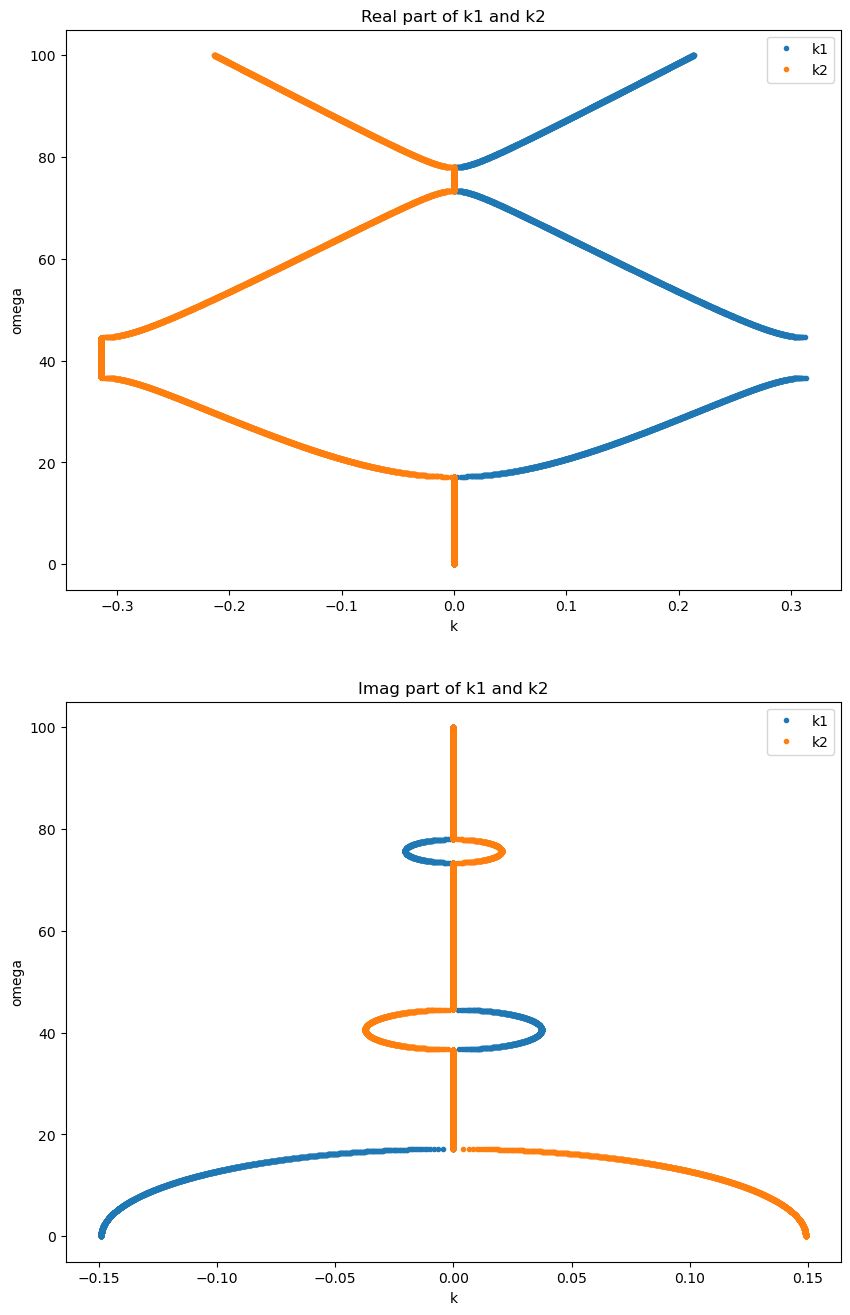

In [63]:
omega_values = np.linspace(0.001, 100, 10000)

T_val = 15E3
rhoA = 1.1

fig, ax = plt.subplots(2, 1, figsize=(10, 16))

# Redraw with switched axes
ax[0].plot(np.real(k1_func(omega_values)), omega_values, '.', label='k1')
ax[0].plot(np.real(k2_func(omega_values)), omega_values, '.',  label='k2')
ax[0].set_ylabel('omega')
ax[0].set_xlabel('k')
ax[0].legend()
ax[0].set_title('Real part of k1 and k2')

ax[1].plot(np.imag(k1_func(omega_values)), omega_values, '.', label='k1')
ax[1].plot(np.imag(k2_func(omega_values)), omega_values, '.',  label='k2')
ax[1].set_ylabel('omega')
ax[1].set_xlabel('k')
ax[1].legend()
ax[1].set_title('Imag part of k1 and k2')

# ax[2].plot(np.abs(k1_lambda(kappa_values)), kappa_values*np.sqrt(T_val/rhoA), label='k1')
# ax[2].plot(np.abs(k2_lambda(kappa_values)), kappa_values*np.sqrt(T_val/rhoA), label='k2')
# ax[2].set_ylabel('omega')
# ax[2].set_xlabel('k')
# ax[2].legend()
# ax[2].set_title('Absolute value of k1 and k2')
# ax[0].set_title('Imaginary part of k1 and k2');

- real part is nonzero when imaginary part is zero and the other way around
- repeating in k with period of 2pi/L.
- repeating in omega with 2pi/L * sqrt(T/rhoA)
- mention stop bands and pass bands
- similarity with beam model

In [23]:
np.pi/10

0.3141592653589793

In [65]:
np.sqrt(15E3/1.1) * 2*np.pi/10

np.float64(73.37179691415753)